In [1]:
import numpy as np
import pickle

with open(".state.pkl", "rb") as f:
    status = pickle.load(f)

# run this if you want to monitor progress of the training
for k, v in status.items():
    v_agg = v if not isinstance(v, dict) else {
        k: (
            (v.mean(), v.std()) if isinstance(v, np.ndarray) else v
        ) for k,v in v.items()}
    print(f"{k:25.25}: {v_agg}")

0-amr-lq                 : True
0-amr-lq-dense-full_separ: {'name': 'model_2019-04-10T23:55:30.450413.zip', 'MSE': (2.10832, 0.45233378), 'MAE': (1.574637, 0.47338328), 'PESQ': (1.7123625, 0.3869752654805601), 'LSD': (8.546503498877591, 2.126215390601775)}
0-amr-lq-dense-full_whole: {'name': 'model_2019-04-11T02:14:55.245116.zip', 'MSE': (2.1101043, 0.4441205), 'MAE': (1.5760313, 0.46214375), 'PESQ': (1.6608875, 0.3539540928478579), 'LSD': (8.589085310785219, 1.9664946463187243)}
0-amr-lq-conv_dense-full_: {'name': 'model_2019-04-11T04:37:21.520666.zip', 'MSE': (2.026483, 0.44157618), 'MAE': (1.4859719, 0.44619372), 'PESQ': (1.9748999999999994, 0.47243686350664893), 'LSD': (8.127746723117545, 2.3132840692638243)}
0-amr-lq-conv_dense-full_: {'name': 'model_2019-04-11T07:45:04.553332.zip', 'MSE': (2.0239484, 0.43369856), 'MAE': (1.4904499, 0.44137678), 'PESQ': (1.8495624999999998, 0.43120400751123594), 'LSD': (8.038307942738669, 2.0705656749605423)}
0-amr-lq-conv_dense_4-ful: {'name': 'm

In [2]:
import numpy as np
import os
import sear_lib

sear_lib.set_device()

src = os.path.join(sear_lib.Config.DATASETPATH, "test_source.bin.npy")
gt = os.path.join(sear_lib.Config.DATASETPATH, "test_target.bin.npy")
phase = os.path.join(sear_lib.Config.DATASETPATH, "test_phase.bin.npy")
src, gt, phase = [np.load(x) for x in [src, gt, phase]]

Using TensorFlow backend.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Switching to CPU only as GPU is busy or unavailable


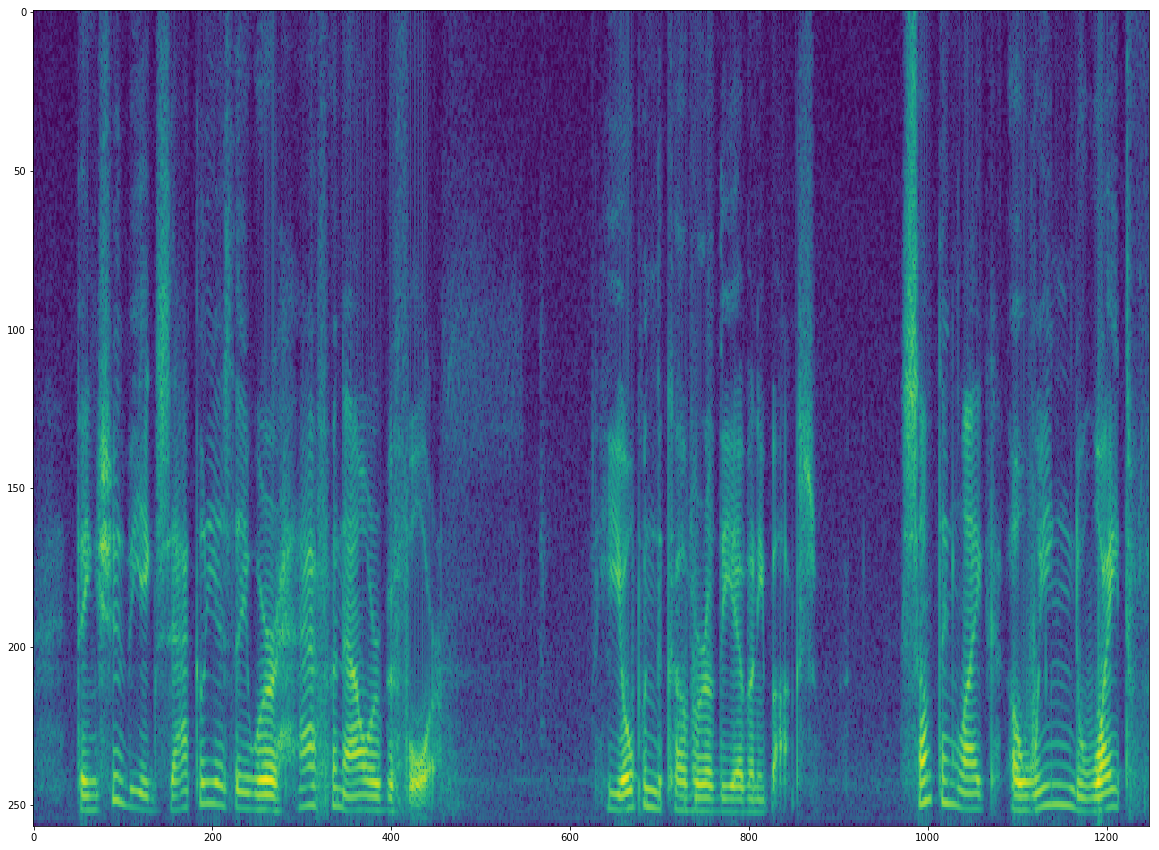

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_spec(spec, log=True, ax=None):
    if spec.dtype in (np.complex64, np.complex128, np.complex):
        spec = -1 * np.log(np.abs(spec)**2 + 2e-12)
    if ax is None:
        plt.figure(figsize=(20, 15))
        return plt.imshow(np.flip(spec.T, 0), aspect='auto')
    return ax.imshow(np.flip(spec.T, 0), aspect='auto')

show_spec(-1 * gt[0])

In [4]:
mdl = sear_lib.ModelInstance.load("runs/2019-05-02T09:48:38.104070.zip")  # dae
mdl2 = sear_lib.ModelInstance.load("runs/2019-05-03T02:50:55.736759.zip") # convdense

In [7]:
preds = mdl.model.predict(src[:1])
preds2 = mdl2.model.predict(src[:1])

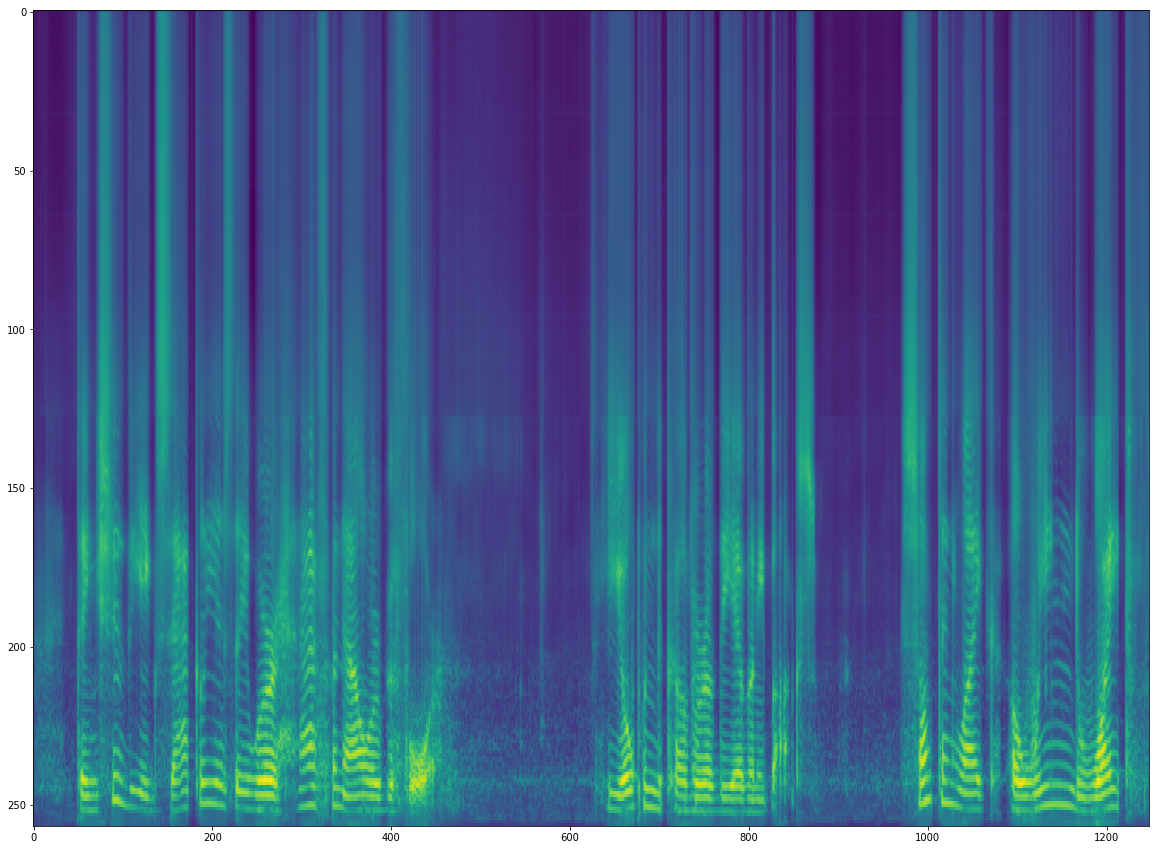

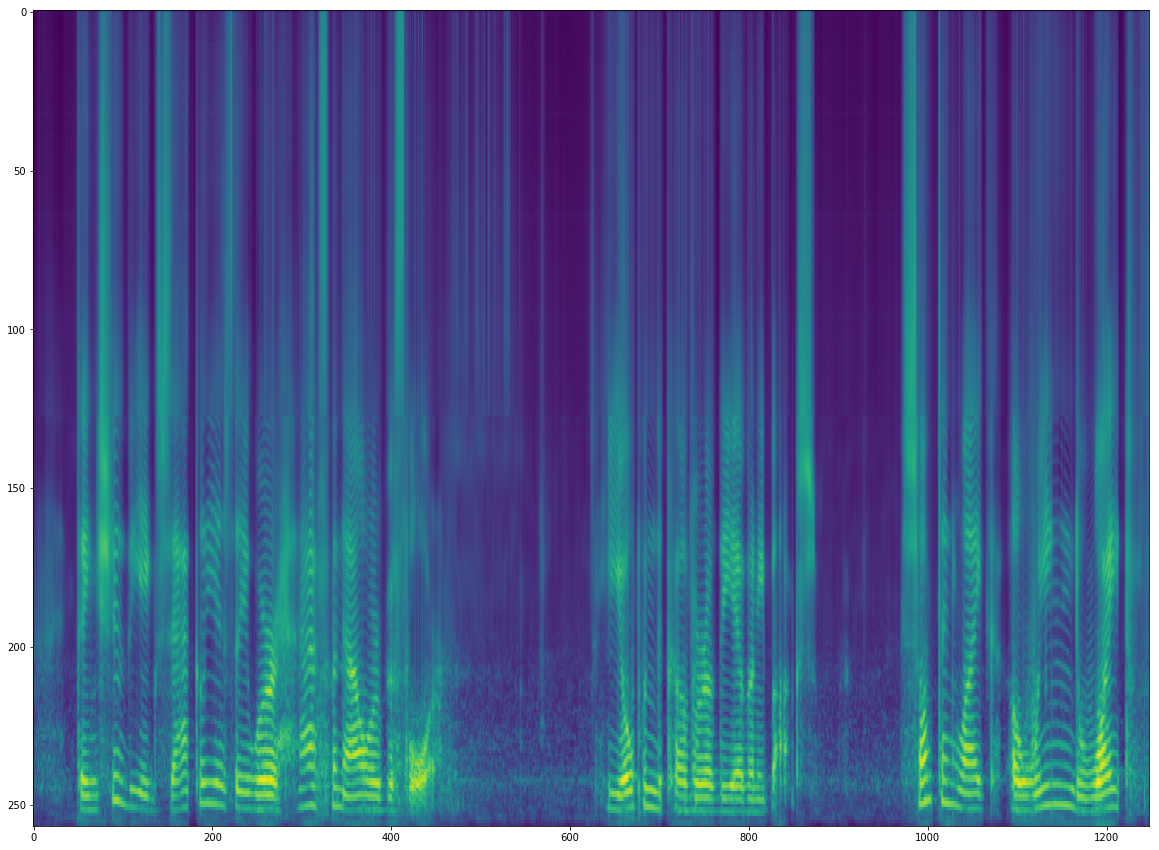

In [8]:
show_spec(-1 * preds[0])
show_spec(-1 * preds2[0])

[Text(0,0,''), Text(0,0,'4kHz'), Text(0,0,''), Text(0,0,''), Text(0,0,'2kHz')]

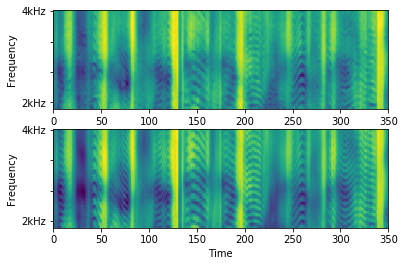

In [29]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=1)
sf1 = show_spec(preds[0, 50:400:, 64:129], ax=axes[0])
sf2 = show_spec(preds2[0, 50:400:, 64:129], ax=axes[1])
axes[1].set_xlabel("Time")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Frequency")
axes[0].set_yticklabels(["", "4kHz", "", "", "2kHz"])
axes[1].set_yticklabels(["", "4kHz", "", "", "2kHz"])